## Overview

In this notebook, we will examine lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the year of 2018. To complete this notebook, we will:

* Find the locations with the greatest number of strikes within a single day
* Examine the locations that had the greatest number of days with at least one lightning strike 
* Determine whether certain days of the week had more lightning strikes than others  
* Add data from 2016 and 2017 and, for each month, calculate the percentage of total lightning strikes for that year that occurred in that month
* Plot this data on a bar graph

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("Data/eda_using_basic_data_functions_in_python_dataset1.csv")

In [4]:
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [6]:
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [7]:
df.shape

(3401012, 3)

In [8]:
df.describe()

,number_of_strikes
count,3.401012e+06
mean,1.311403e+01
std,3.212099e+01
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,1.200000e+01
max,2.211000e+03


In [9]:
df.duplicated().sum()
#no duplicate rows
df.drop_duplicates().shape

(3401012, 3)

In [10]:
# Sort by number of strikes in descending order.
df.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


In [11]:
print(df.date.max(),df.date.min())

2018-12-31 00:00:00 2018-01-01 00:00:00


In [12]:
df['center_point_geom'].value_counts()

POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.5 22.9)     107
POINT(-82.7 22.9)     107
POINT(-82.5 22.8)     106
                     ... 
POINT(-119.3 35.1)      1
POINT(-119.3 35)        1
POINT(-119.6 35.6)      1
POINT(-119.4 35.6)      1
POINT(-58.5 45.3)       1
Name: center_point_geom, Length: 170855, dtype: int64

POINT(-77.8 18.3) is the location with most strikes a day

In [13]:
# Identify the top 20 locations with most days of lightning.
df_new=df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

In [14]:
df_new
#style for the colors you see down below

,unique_values,counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.5 22.9),107
3,POINT(-82.7 22.9),107
4,POINT(-82.5 22.8),106
5,POINT(-84.2 22.3),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


One useful grouping is categorizing lightning strikes by day of the week, which will tell us whether any particular day of the week had fewer or more lightning strikes than others. To calculate this, we will take advantage of the fact that the data in our `date` column is of the `datetime` class. Because these entries are datetime objects, we can extract date-related information from them and create new columns.

First, we will create a column called `week` using `dt.isocalendar()` on the `date` column. This function is designed to be used on a pandas series, and it will return a new dataframe with year, week, and day columns. The information is formatted numerically; for example, January 3, 1950, would be represented as:

| Year | Week | Day |
| ---- | :--: | :-: |
| 1950 | 1    | 3   |

Because we only want to extract the week number, we will add `.week` to the end. You can learn more about `dt.isocalendar()` in the [pandas.Series.dt.isocalendar documentation](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.isocalendar.html).

We will also add a `weekday` column using `dt.day_name()`. This is another pandas function designed to be used on a pandas series. It extracts the text name of the day for any given datetime date. You can learn more about this function in the [pandas.Series.dt.day_name documentation](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.day_name.html).

In [15]:
# Create two new columns.
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


In [16]:
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,13.349972
Monday,13.152804
Saturday,12.732694
Sunday,12.324717
Thursday,13.240594
Tuesday,13.813599
Wednesday,13.224568


In [17]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

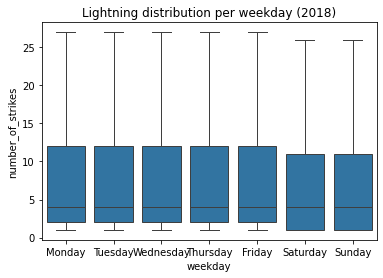

In [18]:
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)');